In [12]:
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import RandomForestClassifier #集成学习中的随机森林
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.model_selection import cross_val_score #交叉验证
import numpy as np

In [5]:
wine = datasets.load_wine()

In [6]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

参数: 
- ***criterion:*** 特征选择的方式，可选“gini”, “entropy”，默认“gini”
- ***n_estimators:*** 随机森林中决策树的数量，可选择(默认值为10)
- ***random_state***：随机数生成器使用的种子
- ***max_features***：寻找最佳分割时要考虑的特征数量
- ***max_depth***：树的最大深度
- ***max_features***:随机森林允许单个决策树使用特征的最大数量
- ***Auto/None***：简单地选取所有特征，每颗树都可以利用他们。
                  这种情况下，每颗树都没有任何的限制。
- ***sqrt***：此选项是每颗子树可以利用总特征数的平方根个。 注意需要取整。
             例如，如果变量（特征）的总数是100，所以每颗子树只能取其中的10个。
- ***比例***，比如0.2：此选项允许每个随机森林的子树可以利用变量（特征）数的20％。

In [9]:
#数据集切分
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

#决策树模型
clf = DecisionTreeClassifier(random_state=0,criterion="entropy")

#随机森林模型
rfc = RandomForestClassifier(random_state=0,
                             criterion="entropy",
                             n_estimators=3,
                             #max_features=int(np.sqrt(len(wine.features_names)))
                             max_features=0.9)

#模型训练
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

#测试集上的预测准确率
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

In [19]:
print('Single Tree:%s,Random Forest:%s'
      %(round(score_c,3),round(score_r,3)))

Single Tree:0.963,Random Forest:0.981


上面的实验中，n_estimators参数设置为3，表示在随机森林中决策树  的数量为3  
也是通常所说的基评估器的数量  
上述决策树数量设置为3，是随便设置的  
那问题来了，怎么设置才能获得最佳的效果呢？  

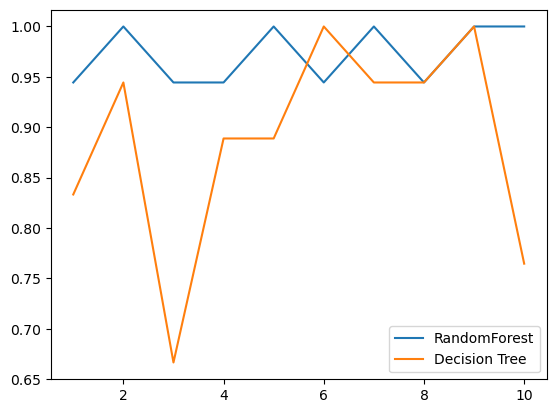

In [30]:
#画出随机森林和决策树在一组交叉验证下的效果对比
rfc = RandomForestClassifier(n_estimators=20,criterion="entropy")
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier(criterion="entropy")
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

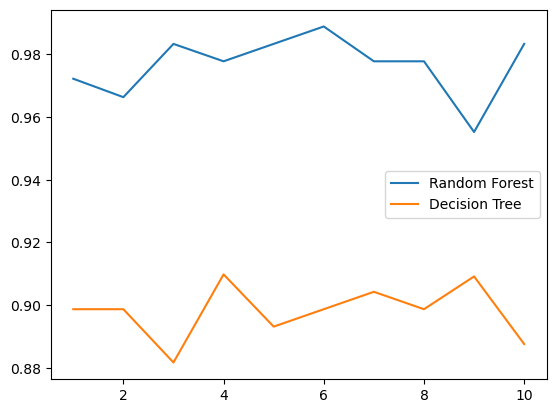

In [31]:
# 画出随机森林和决策树在十组交叉验证下的效果比对
rfc_1=[]
clf_1=[]
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=20,criterion="entropy")
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_1.append(rfc_s)
    clf = DecisionTreeClassifier(criterion="entropy")
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_1.append(clf_s)

plt.plot(range(1,11),rfc_1,label = "Random Forest")
plt.plot(range(1,11),clf_1,label = "Decision Tree")
plt.legend()
plt.show()

In [44]:
# n_estimators的学习曲线
superpa = []
for i in range(100):
    #这里就是进行了100次的随机森林算法，每次的n_estimator设置不一样
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,criterion="entropy")
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)

最大的准确率为：0.989,对应的n_estimators=33.


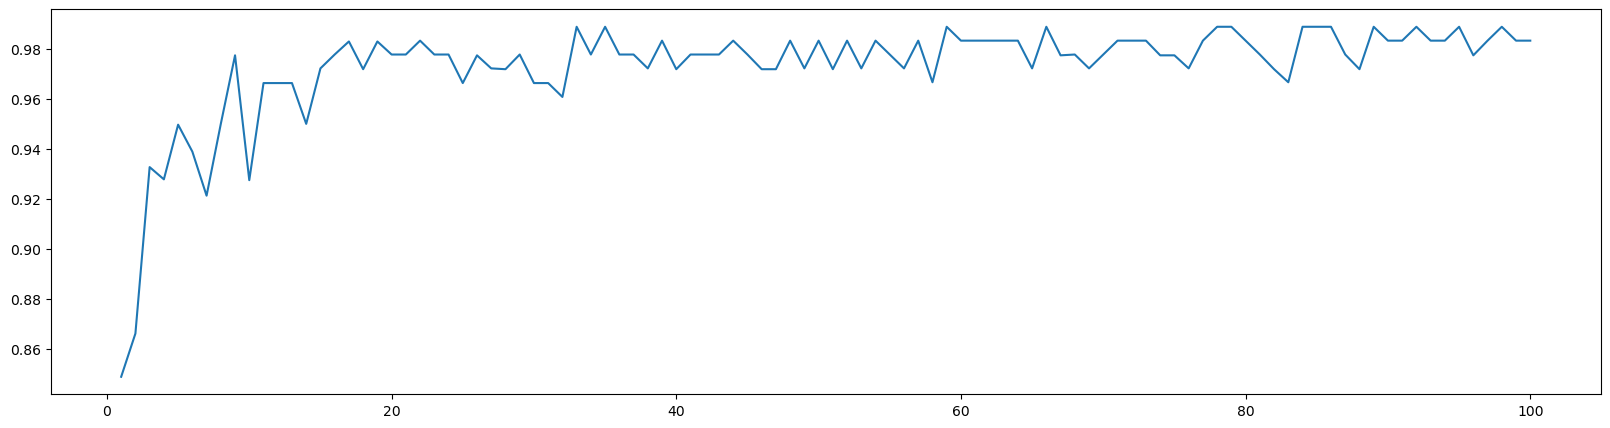

In [45]:
print("最大的准确率为：%s,对应的n_estimators=%s."
      % (round(max(superpa),3),superpa.index(max(superpa))+1))
plt.figure(figsize=[20,5])
plt.plot(range(1,101),superpa)
plt.show()

In [46]:
#创建随机森林分类器
rfc = RandomForestClassifier(n_estimators=29,criterion="entropy")
#模型训练
rfc = rfc.fit(Xtrain,Ytrain)
#预测
rfc.score(Xtest,Ytest)
#得出所有特征的重要性数值
rfc.feature_importances_

array([0.11446774, 0.00965639, 0.01576865, 0.03084214, 0.03988541,
       0.09790659, 0.20660281, 0.00107575, 0.04705401, 0.10791914,
       0.08079377, 0.089578  , 0.15844959])

In [47]:
#返回测试集每个样本在所在树的叶子节点的索引
rfc.apply(Xtest)

array([[11, 15, 16, ..., 17, 14, 16],
       [ 7,  6,  2, ...,  2,  3,  5],
       [11, 15, 16, ..., 17, 14, 16],
       ...,
       [ 2, 11,  4, ...,  7,  6, 15],
       [ 4, 11, 15, ...,  7, 13, 15],
       [ 7, 11,  2, ...,  6,  8,  5]], dtype=int64)

In [48]:
#预测结果
rfc.predict(Xtest)

array([0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1,
       2, 0, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       1, 0, 2, 1, 2, 0, 1, 1, 1, 2])

In [49]:
#每一个样本在不同的类别上的概率
rfc.predict_proba(Xtest)

array([[1.        , 0.        , 0.        ],
       [0.        , 0.03448276, 0.96551724],
       [0.96551724, 0.03448276, 0.        ],
       [0.72413793, 0.24137931, 0.03448276],
       [0.89655172, 0.10344828, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.96551724, 0.03448276, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.96551724, 0.03448276, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.10344828, 0.89655172, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.03448276, 0.03448276, 0.93103448],
       [0.24137931, 0.68965517, 0.06896552],
       [0.06896552, 0.86206897, 0.06896552],
       [0.        , 0.96551724, 0.03448276],
       [0.03448276, 0.10344828, 0.86206897],
       [0.68965517, 0.24137931, 0.06896552],
       [0.06896552, 0.        , 0.93103448],
       [0.06896552, 0.82758621, 0.10344828],
       [0.17241379, 0.72413793, 0.10344828],
       [0.

**网格搜索法**
通过遍历给定的参数组合来优化模型表现，自动遍历给定的超参数，从而得到范围内的最优模型。  

**网格搜索法和交叉验证接口**  
sklearn.model_selection.GridSearchCV(estimator,param_grid=None,cv=None)

**参数说明**  
estimator：估计器对象  # KNN,决策树等  
param_grid：估计器的参数  

cv:指定交叉验证的折数  
**输出结果**  
best_params_  
best_score_  
best_estimator_  
cv_results_  

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier(criterion="entropy")
#确定网格交叉验证的参数
param_dict = {"n_estimators":[10,20,30,50],
              "max_depth":[2,3,5,10]}

estimator = GridSearchCV(estimator,param_grid=param_dict,cv=3)
estimator.fit(Xtrain,Ytrain)

#预测
y_predict=estimator.predict(Xtest)

In [52]:
#模型评估
score=estimator.score(Xtest,Ytest)
print("随机森林算法准确率：\n",score)

#打印最佳参数
print("最佳参数：\n",estimator.best_params_)
#最佳结果
print("最佳结果：\n",estimator.best_score_)
#最佳预估器
print("最佳预估器：\n",estimator.best_estimator_)
#交叉验证结果
print("最佳预估器：\n",estimator.cv_results_)

随机森林算法准确率：
 0.9814814814814815
最佳参数：
 {'max_depth': 2, 'n_estimators': 20}
最佳结果：
 0.9920634920634921
最佳预估器：
 RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=20)
最佳预估器：
 {'mean_fit_time': array([0.00833384, 0.01399962, 0.02200007, 0.03630106, 0.00800745,
       0.01433341, 0.02185829, 0.03633372, 0.00796437, 0.01491364,
       0.02233712, 0.03731815, 0.00733217, 0.01633437, 0.02439268,
       0.04222814]), 'std_fit_time': array([4.71595177e-04, 5.94720425e-07, 5.15042996e-07, 1.06934794e-03,
       4.08170766e-04, 4.71763734e-04, 2.00169433e-04, 4.71763734e-04,
       5.89246104e-05, 1.72970374e-04, 4.68241235e-04, 4.81796909e-04,
       4.71819960e-04, 1.24704385e-03, 9.57133800e-04, 1.36129735e-03]), 'mean_score_time': array([0.00100001, 0.00166647, 0.00200073, 0.00333325, 0.00100048,
       0.00133316, 0.00199986, 0.00366672, 0.00099937, 0.001676  ,
       0.00233253, 0.0035224 , 0.00133403, 0.00199874, 0.00255768,
       0.00453393]), 'std_score_time': array([1